In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf','svg')
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression

In [2]:
data = pd.read_csv('D:\\study\\Tum\\QoE\\subject_data\\eight.csv')
data 

,Worker ID,Finished,Begin,Unnamed: 3,End,Unnamed: 5,Step 1,Step 2,Unnamed: 8,Unnamed: 9,...,Step 25,Unnamed: 93,Unnamed: 94,Step 26,Unnamed: 96,Unnamed: 97,Step 27,Unnamed: 99,Unnamed: 100,Step Order
0,NaN,NaN,Date,Time,Date,Time,Duration,Duration,Results,NaN,...,Duration,Results,NaN,Duration,Results,NaN,Duration,Results,NaN,NaN
1,A10O5YR01H865K,Yes,03.07.2018,05:22:07,03.07.2018,05:28:20,15,14,Male,2.0,...,10,Good,4.0,11,Fair,3.0,11,Good,4.0,1 2 3 4 8 5 6 7 9 27 15 14 25 23 17 20 26 22 1...
2,A12A5GVJX5RZC4,Yes,03.07.2018,05:30:55,03.07.2018,05:37:01,4,14,Male,2.0,...,11,Good,4.0,12,Good,4.0,10,Good,4.0,1 2 3 4 6 7 8 5 9 16 14 13 20 24 22 25 26 19 2...
3,A12IHTKQFQIPD1,Yes,03.07.2018,05:22:04,03.07.2018,05:32:48,3,9,Male,2.0,...,10,Good,4.0,10,Good,4.0,106,Good,4.0,1 2 3 4 5 7 6 8 9 24 12 13 17 23 10 15 27 14 1...
4,A13HZKB2NGZP6B,Yes,03.07.2018,05:49:49,03.07.2018,05:55:32,15,7,Female,1.0,...,13,Good,4.0,15,Good,4.0,11,Excellent,5.0,1 2 3 4 7 5 8 6 9 10 13 19 18 21 12 24 15 11 1...
5,A18G2CLYSTENK,Yes,03.07.2018,05:46:34,03.07.2018,05:58:52,3,89,Male,2.0,...,28,Excellent,5.0,31,Excellent,5.0,13,Excellent,5.0,1 2 3 4 5 6 7 8 9 20 14 25 24 15 16 10 12 17 1...
6,A18LPAFMK1B06K,Yes,03.07.2018,05:30:00,03.07.2018,05:34:05,15,7,Male,2.0,...,9,Fair,3.0,8,Fair,3.0,11,Fair,3.0,1 2 3 4 7 6 5 8 9 15 18 13 10 14 27 11 21 22 2...
7,A1945USNZHTROX,Yes,03.07.2018,05:32:36,03.07.2018,05:39:54,3,8,Male,2.0,...,12,Excellent,5.0,10,Good,4.0,10,Good,4.0,1 2 3 4 8 6 7 5 9 20 11 26 16 23 21 10 12 19 2...
8,A199ECPSCLODO6,Yes,03.07.2018,05:21:31,03.07.2018,05:29:03,3,10,Female,1.0,...,19,Excellent,5.0,10,Excellent,5.0,10,Excellent,5.0,1 2 3 4 5 7 6 8 9 23 15 11 22 19 21 16 12 24 2...
9,A1AQQFJAF8CI4H,Yes,03.07.2018,06:00:52,03.07.2018,06:11:09,2,18,Male,2.0,...,19,Excellent,5.0,12,Excellent,5.0,82,Excellent,5.0,1 2 3 4 6 5 7 8 9 27 21 16 26 24 11 12 25 15 2...


In [88]:
# read subjective video quality date from excel (1,2,3,4,5 correspoding to good, bad or excellent...)
Video_quality = data.iloc[1:,[49]]
Video_quality = np.array(Video_quality)
for i in range(1,18):
    X_raw = data.iloc[1:,[49+i*3]]
    X_data = np.array(X_raw)
    Video_quality = np.concatenate((Video_quality, X_data), axis=1)

Video_quality = np.nan_to_num(Video_quality)
Video_quality.shape

(81, 18)

In [89]:
# remove NAN data 
list = []
for i in range(0,Video_quality.shape[0]):
    if Video_quality[i, 17]== 0:
        list.append(i)
list

Video_quality = np.delete(Video_quality, list, axis=0)
Video_quality[1,:]

array([ 4.,  1.,  4.,  2.,  4.,  1.,  3.,  3.,  3.,  2.,  3.,  3.,  2.,
        4.,  4.,  4.,  4.,  4.])

In [92]:
# Average Video quality 
Video_mean = np.mean(Video_quality, axis=0)
Video_mean = Video_mean.reshape(18,1)
print(Video_mean)
One_dmos_1 = Video_mean[0] - Video_mean[4:11,]
One_dmos_2 =  Video_mean[2] - Video_mean[11:,]
print(One_dmos_1)

[[ 4.05333333]
 [ 1.45333333]
 [ 4.13333333]
 [ 2.28      ]
 [ 4.28      ]
 [ 1.44      ]
 [ 2.10666667]
 [ 2.98666667]
 [ 3.46666667]
 [ 1.52      ]
 [ 2.2       ]
 [ 4.12      ]
 [ 2.37333333]
 [ 3.45333333]
 [ 4.08      ]
 [ 4.10666667]
 [ 4.13333333]
 [ 4.17333333]]
[[-0.22666667]
 [ 2.61333333]
 [ 1.94666667]
 [ 1.06666667]
 [ 0.58666667]
 [ 2.53333333]
 [ 1.85333333]]


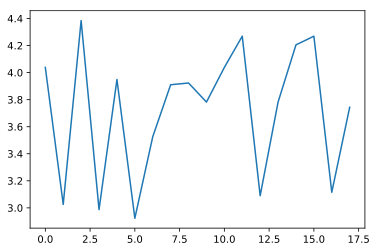

In [80]:
plt.figure()
#plt.plot(Video_quality)
plt.plot(Video_mean)
plt.show()